Dataset: Supermarket Sales in Cities  

---


Question considered:
1. Highest average gross
income by City   
2. Profit made per City
3. Total profit made by city per product
4. Gender with higher average spending
5. Product line with highest average rating

Importing Required Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [ ]:

# ▶ Option 1: Upload your own CSV (Colab)
# In Colab: run this cell, click "Choose Files", then set the filename in the next cell.
try:
    from google.colab import files  # will fail outside Colab
    uploaded = files.upload()
    print("Uploaded files:", list(uploaded.keys()))
except Exception as e:
    print("If you're in Colab, this will work. Otherwise, skip to Option 2 or load from local path.")


Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1 (3).csv
Uploaded files: ['supermarket_sales - Sheet1 (3).csv']


Data Exploration

In [ ]:
csv_path = 'supermarket_sales - Sheet1.csv'
if csv_path:
    df = pd.read_csv(csv_path)
    print("Loaded:", csv_path)
    display(df.head())

Loaded: supermarket_sales - Sheet1.csv


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
display(df.tail())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

None

In [ ]:
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 1000
Number of Columns: 17


In [ ]:
display(df.dtypes)

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [ ]:
df = df.assign(
    Cogs = df['cogs'],
    Gross_income = df['gross income'],
    Gross_margin_percentage = df['gross margin percentage']
)


In [ ]:
df = df.drop(columns=['cogs', 'gross income', 'gross margin percentage'])

In [ ]:
display(df.count())

,0
Invoice ID,1000
Branch,1000
City,1000
Customer type,1000
Gender,1000
Product line,1000
Unit price,1000
Quantity,1000
Tax 5%,1000
Total,1000


Data Wrangling

In [ ]:
display(df.isnull().sum())

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Rating', 'Cogs', 'Gross_income',
       'Gross_margin_percentage'],
      dtype='object')

Statistical Analysis

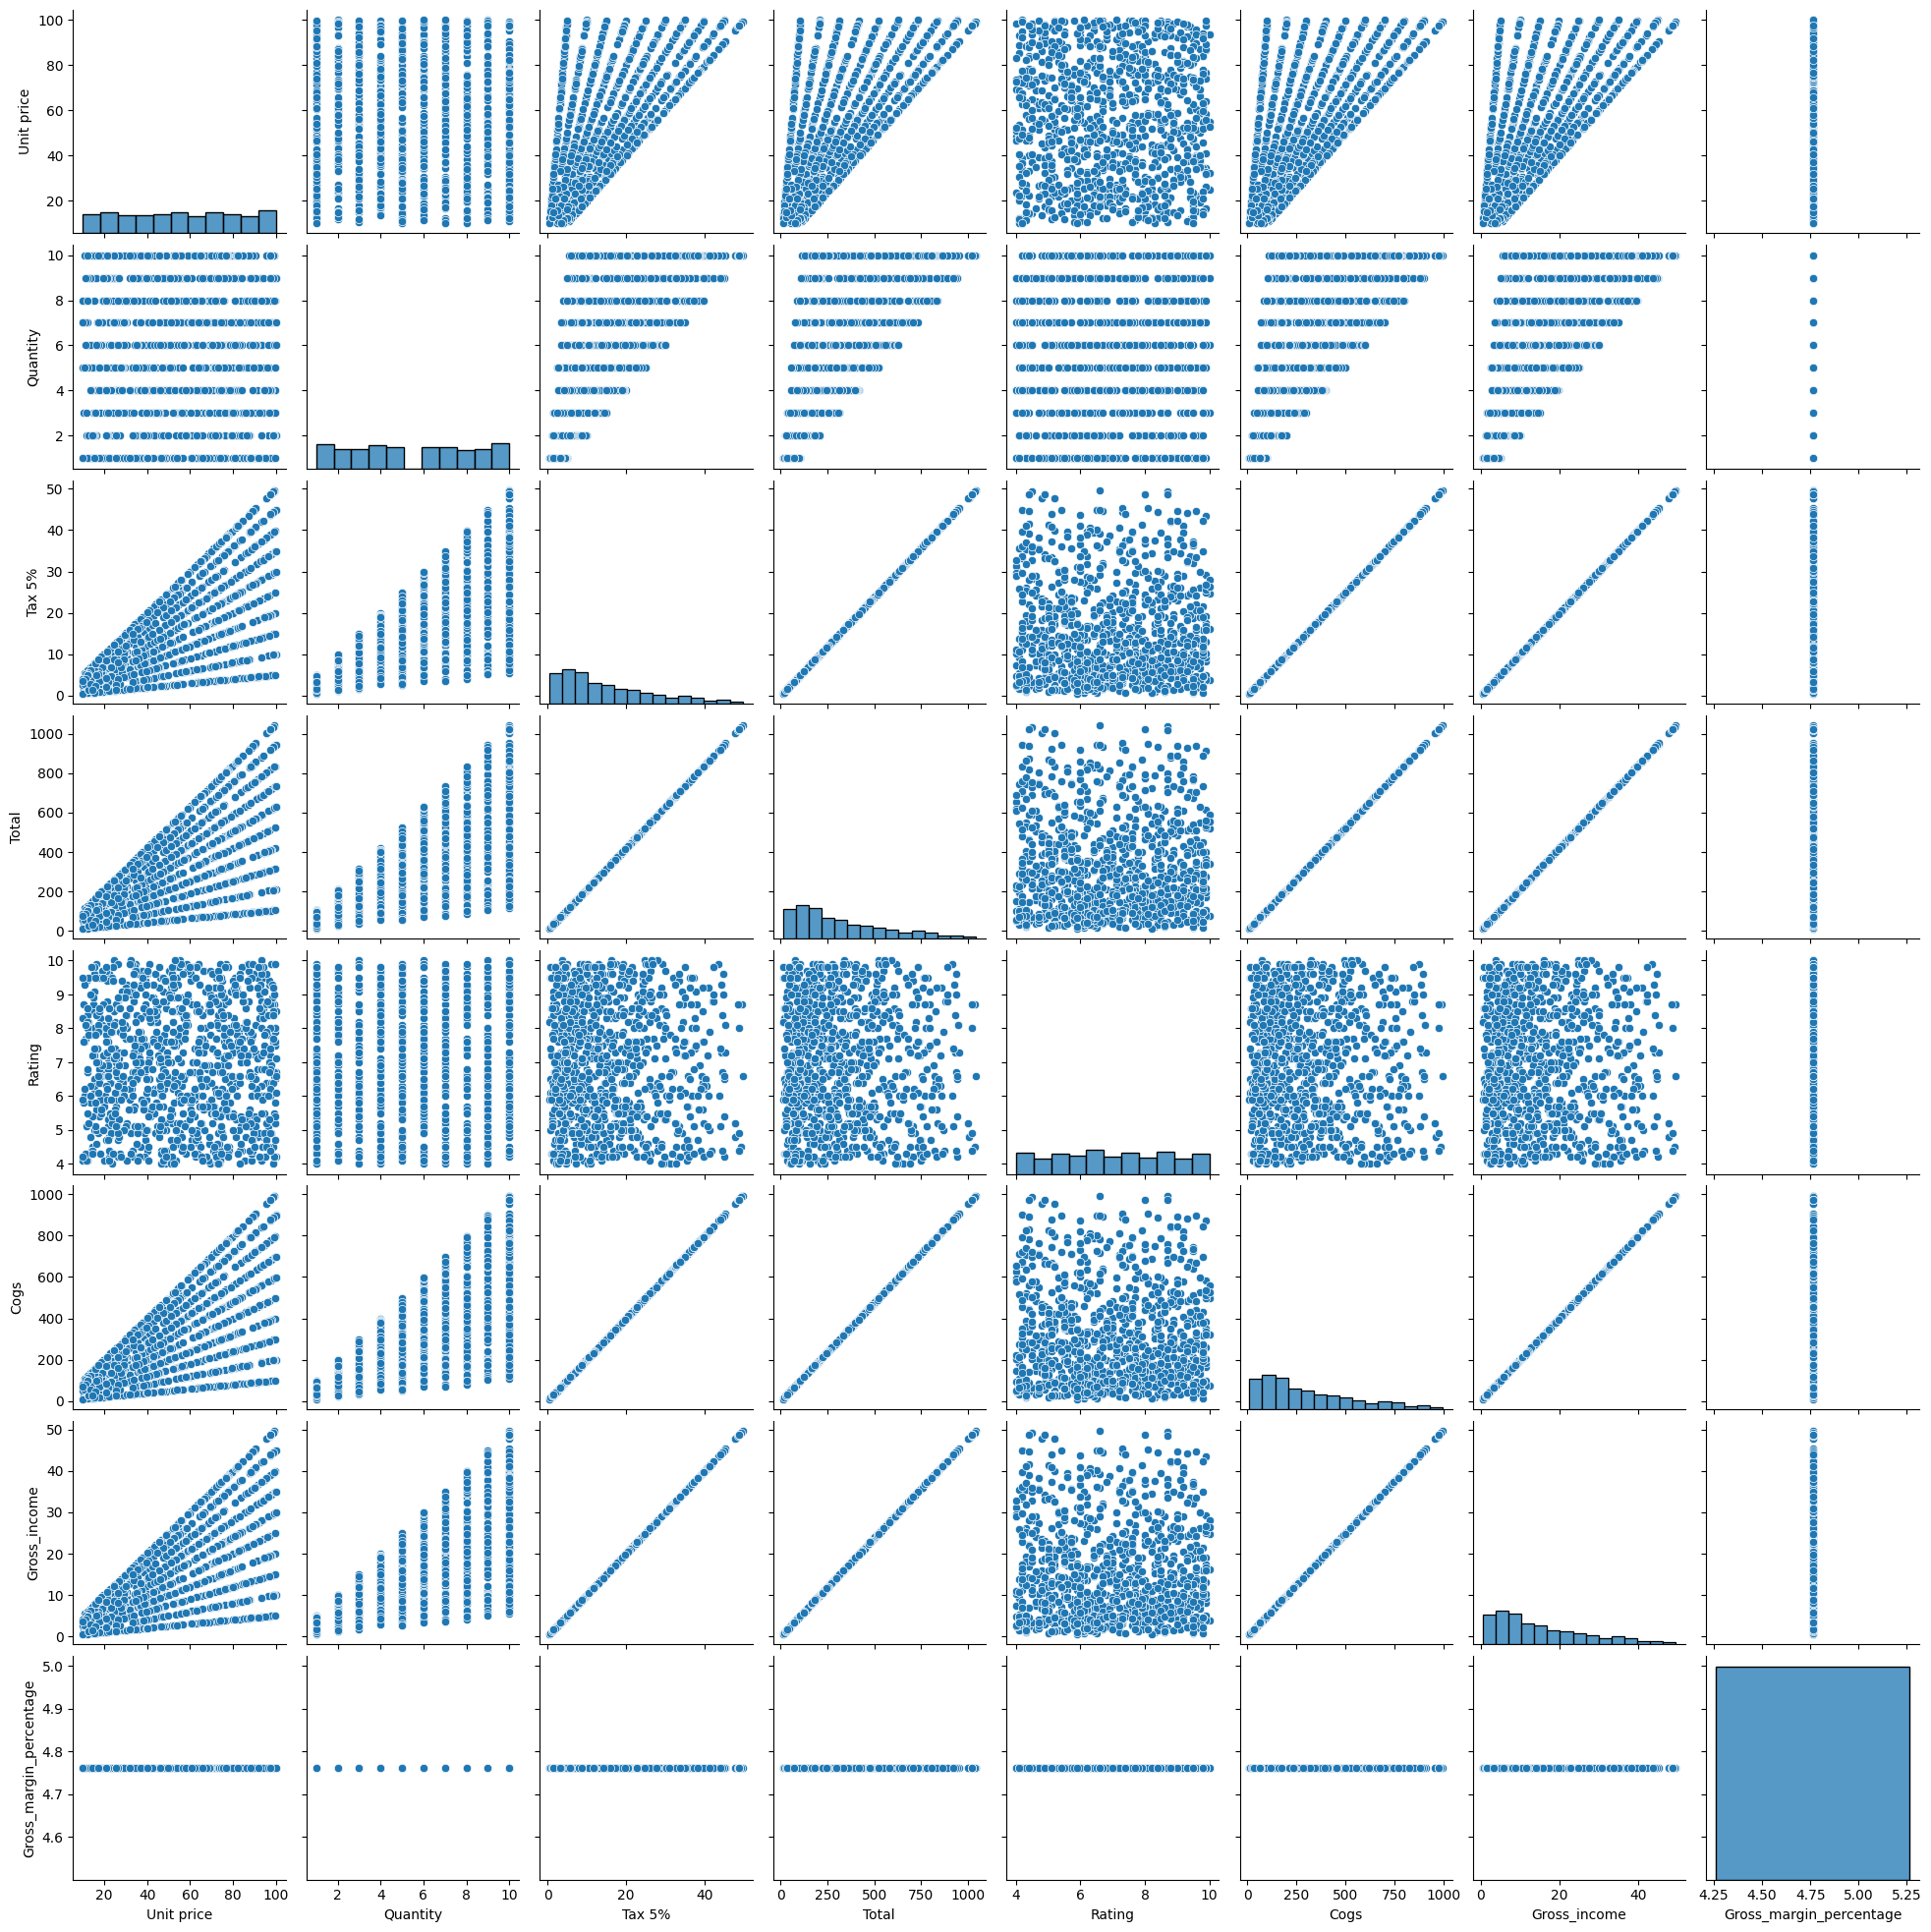

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Rating,Cogs,Gross_income,Gross_margin_percentage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1.000000e+03
mean,55.672130,5.510000,15.379369,322.966749,6.97270,307.58738,15.379369,4.761905e+00
std,26.494628,2.923431,11.708825,245.885335,1.71858,234.17651,11.708825,6.131498e-14
min,10.080000,1.000000,0.508500,10.678500,4.00000,10.17000,0.508500,4.761905e+00
25%,32.875000,3.000000,5.924875,124.422375,5.50000,118.49750,5.924875,4.761905e+00
50%,55.230000,5.000000,12.088000,253.848000,7.00000,241.76000,12.088000,4.761905e+00
75%,77.935000,8.000000,22.445250,471.350250,8.50000,448.90500,22.445250,4.761905e+00
max,99.960000,10.000000,49.650000,1042.650000,10.00000,993.00000,49.650000,4.761905e+00


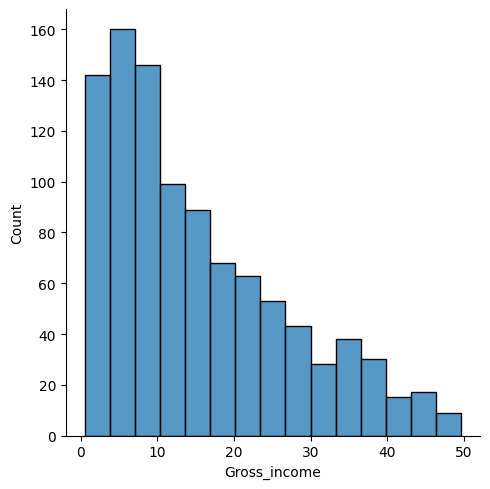

In [ ]:
sns.displot(df, x='Gross_income')

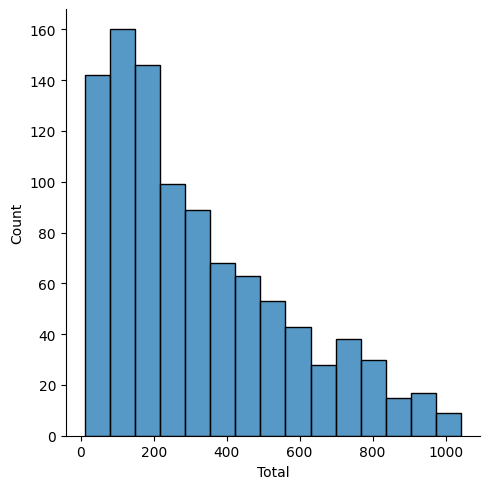

In [ ]:
sns.displot(df, x='Total')

In [ ]:
obj_df = df.select_dtypes(include='object')
obj_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet


In [ ]:
def describe_object(df, col_name):
    print(f"\nCOLUMN: {col_name}")
    print(f"{df[col_name].nunique()} different values")
    print(f"Value Counts:")
    print(df[col_name].value_counts(normalize=True))

In [ ]:
describe_object(obj_df, 'City')


COLUMN: City
3 different values
Value Counts:
City
Yangon       0.340
Mandalay     0.332
Naypyitaw    0.328
Name: proportion, dtype: float64


Highest avg gross income by City

In [ ]:
Gross_avg_by_city = df.groupby('City')['Gross_income'].mean()
Gross_avg_by_city

,Gross_income
City,
Mandalay,15.232024
Naypyitaw,16.052367
Yangon,14.874001


In [ ]:
Gross_avg_by_city = df.groupby('City')['Gross_income'].mean().idxmax()
Gross_avg_by_city

'Naypyitaw'

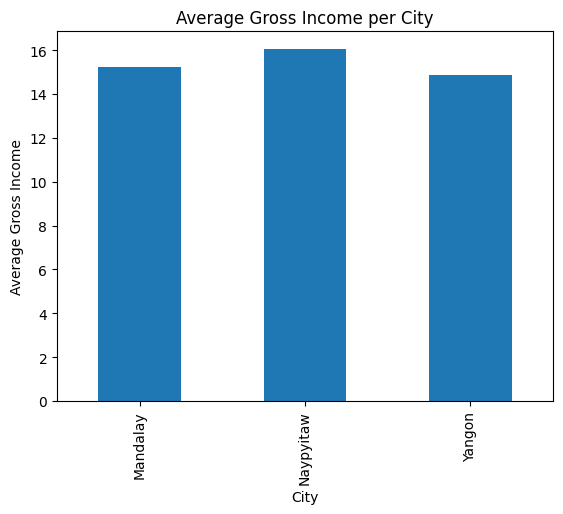

In [ ]:
df_city_income = df.groupby('City')['Gross_income'].mean()
df_city_income.plot.bar(x='City', y='Gross_income')
plt.title('Average Gross Income per City')
plt.xlabel('City')
plt.ylabel('Average Gross Income')
plt.show()

Profit made per City

In [ ]:
df['Profit'] = df['Total'] - df['Cogs']
print(df['Profit'])

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    48.6900
997     1.5920
998     3.2910
999    30.9190
Name: Profit, Length: 1000, dtype: float64


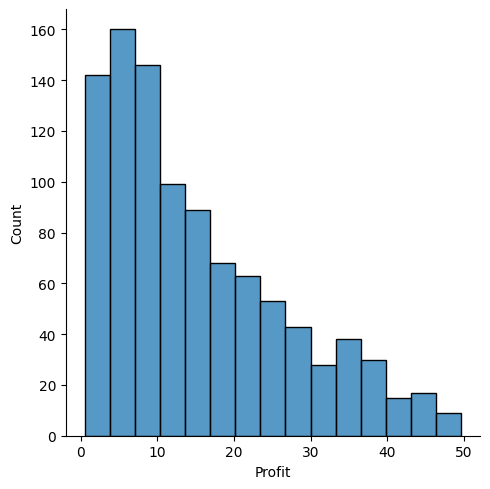

In [ ]:
sns.displot(df, x='Profit')

In [ ]:
Total_profit_by_city = df.groupby(df['City'])['Profit'].sum().reset_index()
Total_profit_by_city

,City,Profit
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


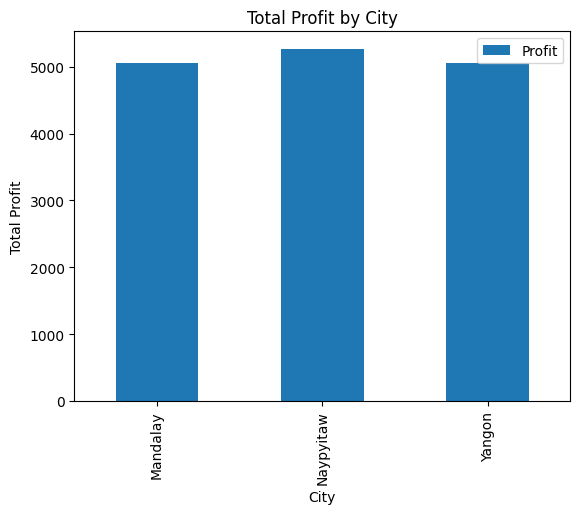

In [ ]:
Total_profit_by_city.plot.bar(x='City', y='Profit')
plt.title('Total Profit by City')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.show()

Total profit made by city per product

In [ ]:
Total_profit_city_by_Product = df.groupby(['City', 'Product line']).agg({'Profit':'sum'}).reset_index()
Total_profit_city_by_Product = Total_profit_city_by_Product.sort_values('Profit', ascending=False)
Total_profit_city_by_Product.head(30)

,City,Product line,Profit
8,Naypyitaw,Food and beverages,1131.7550
16,Yangon,Home and lifestyle,1067.4855
7,Naypyitaw,Fashion accessories,1026.6700
5,Mandalay,Sports and travel,951.8190
3,Mandalay,Health and beauty,951.4600
17,Yangon,Sports and travel,922.5095
6,Naypyitaw,Electronic accessories,903.2845
12,Yangon,Electronic accessories,872.2435
4,Mandalay,Home and lifestyle,835.6745
14,Yangon,Food and beverages,817.2905


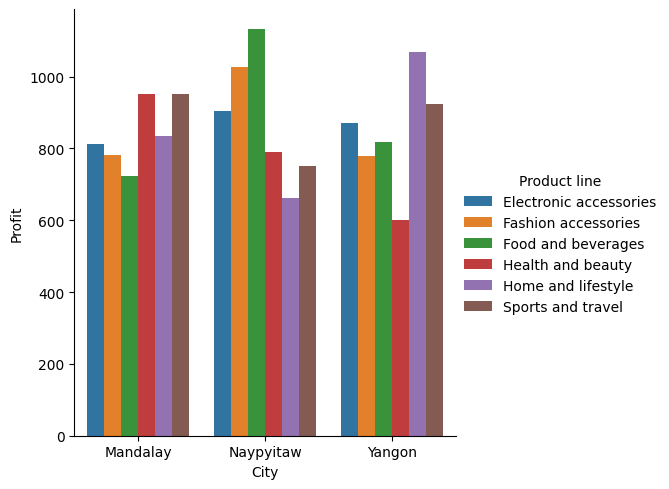

In [ ]:
Total_profit_by_Product = df.groupby(['City','Product line']).agg({'Profit':'sum'})
sns.catplot(data=Total_profit_by_Product, x='City', y='Profit', hue='Product line', kind='bar')

Gender with higher average spending

In [ ]:
Gender_highest_avg_spending = df.groupby('Gender')['Total'].mean()
Gender_highest_avg_spending

,Total
Gender,
Female,335.095659
Male,310.789226


In [ ]:
Gender_highest_avg_spending = df.groupby('Gender')['Total'].mean().idxmax()
Gender_highest_avg_spending

'Female'

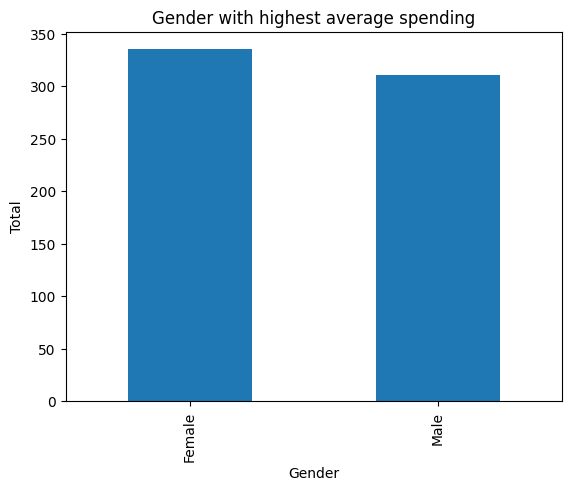

In [ ]:
Gender_highest_avg_spending = df.groupby('Gender')['Total'].mean()
Gender_highest_avg_spending.plot.bar(x='Gender', y='Total')
plt.title("Gender with highest average spending")
plt.xlabel('Gender')
plt.ylabel('Total')
plt.show()

Peak sales hour

In [ ]:
Highest_sales_hours = df.groupby(['Time', 'Date'])['Total'].sum().idxmax()
Highest_sales_hours

('11:28', '2/7/2019')

Product line with highest average rating

In [ ]:
Product_line_highest_avg_rating = df.groupby('Product line')['Rating'].mean()
Product_line_highest_avg_rating = Product_line_highest_avg_rating.sort_values(ascending=False)
Product_line_highest_avg_rating

,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


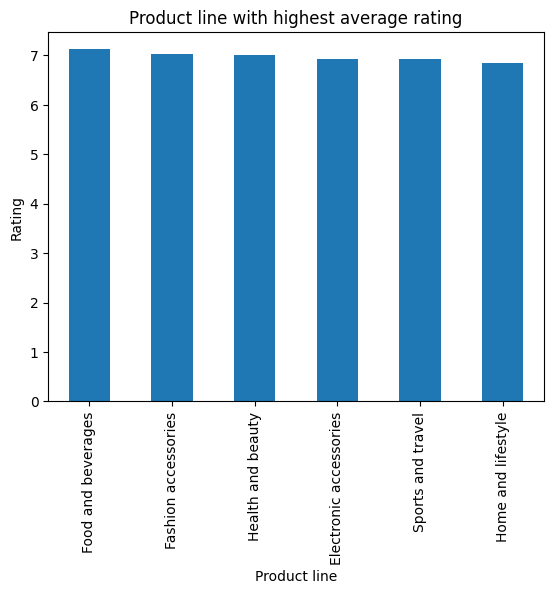

In [ ]:
Product_line_highest_avg_rating.plot.bar(x='Product line', y= 'Rating')
plt.title('Product line with highest average rating')
plt.xlabel('Product line')
plt.ylabel('Rating')
plt.show()

Conclusion: More profit is realized from 	Naypyitaw, the female have highest average spending, and food and berage have highest rating from the customers perspective